In [3]:
import pandas as pd #type: ignore
df = pd.read_csv('nasa_data.csv')
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [5]:
df.is_hazardous.value_counts()

is_hazardous
False    295037
True      43162
Name: count, dtype: int64

In [6]:
df = df.drop(columns=['neo_id', 'name', 'orbiting_body'], axis = 1)
df = df.dropna()
df

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07,False
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07,False
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07,False
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06,False


In [7]:
input_features = df.columns[:-1]
output_feature = df.columns[-1]
input_features

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit(df[input_features])
scaled_array = scaler.transform(df[input_features])
X = pd.DataFrame(scaled_array, columns=input_features)
X

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,-1.302731,0.755531,0.755531,0.783541,0.799465
1,-1.522570,1.186833,1.186833,2.230682,0.686701
2,-0.509247,-0.068476,-0.068476,-0.992221,1.235742
3,-0.790916,0.130785,0.130785,1.054174,-0.536198
4,-0.079872,-0.258549,-0.258549,0.188505,1.038946
...,...,...,...,...,...
338166,1.939905,-0.486486,-0.486486,0.211629,1.084525
338167,1.977690,-0.487290,-0.487290,-1.133689,-0.579888
338168,-0.348145,-0.152838,-0.152838,-1.485915,0.574048
338169,0.327862,-0.361392,-0.361392,0.194636,-1.749811


In [9]:
hazardous_dict = {}
for index, value in enumerate(df.is_hazardous.unique()):
    hazardous_dict[value] = index
print(hazardous_dict)
y = df.is_hazardous.map(hazardous_dict)
y.shape

{False: 0, True: 1}


(338171,)

In [10]:
y = pd.DataFrame(y, columns=['is_hazardous'])
y

,is_hazardous
0,0
1,1
2,0
3,0
4,0
...,...
338194,0
338195,0
338196,0
338197,0


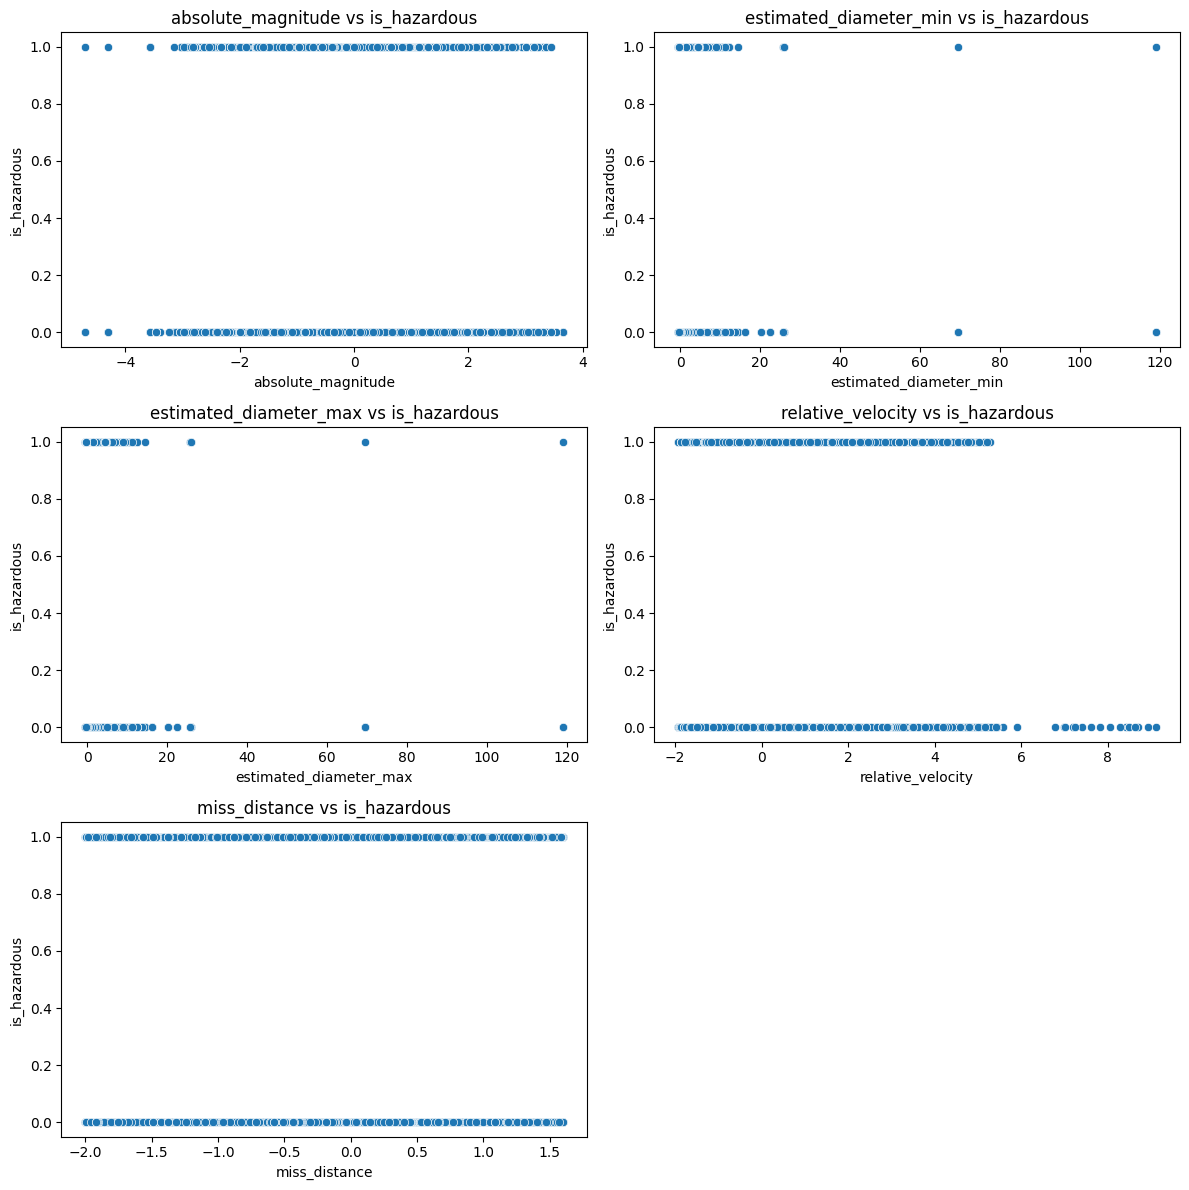

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
for i, features in enumerate(input_features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x = X[features], y = y['is_hazardous'])
    plt.title(f'{features} vs {y.columns[0]}')
    plt.xlabel(features)
    plt.ylabel(y.columns[0])

plt.tight_layout()
plt.show()

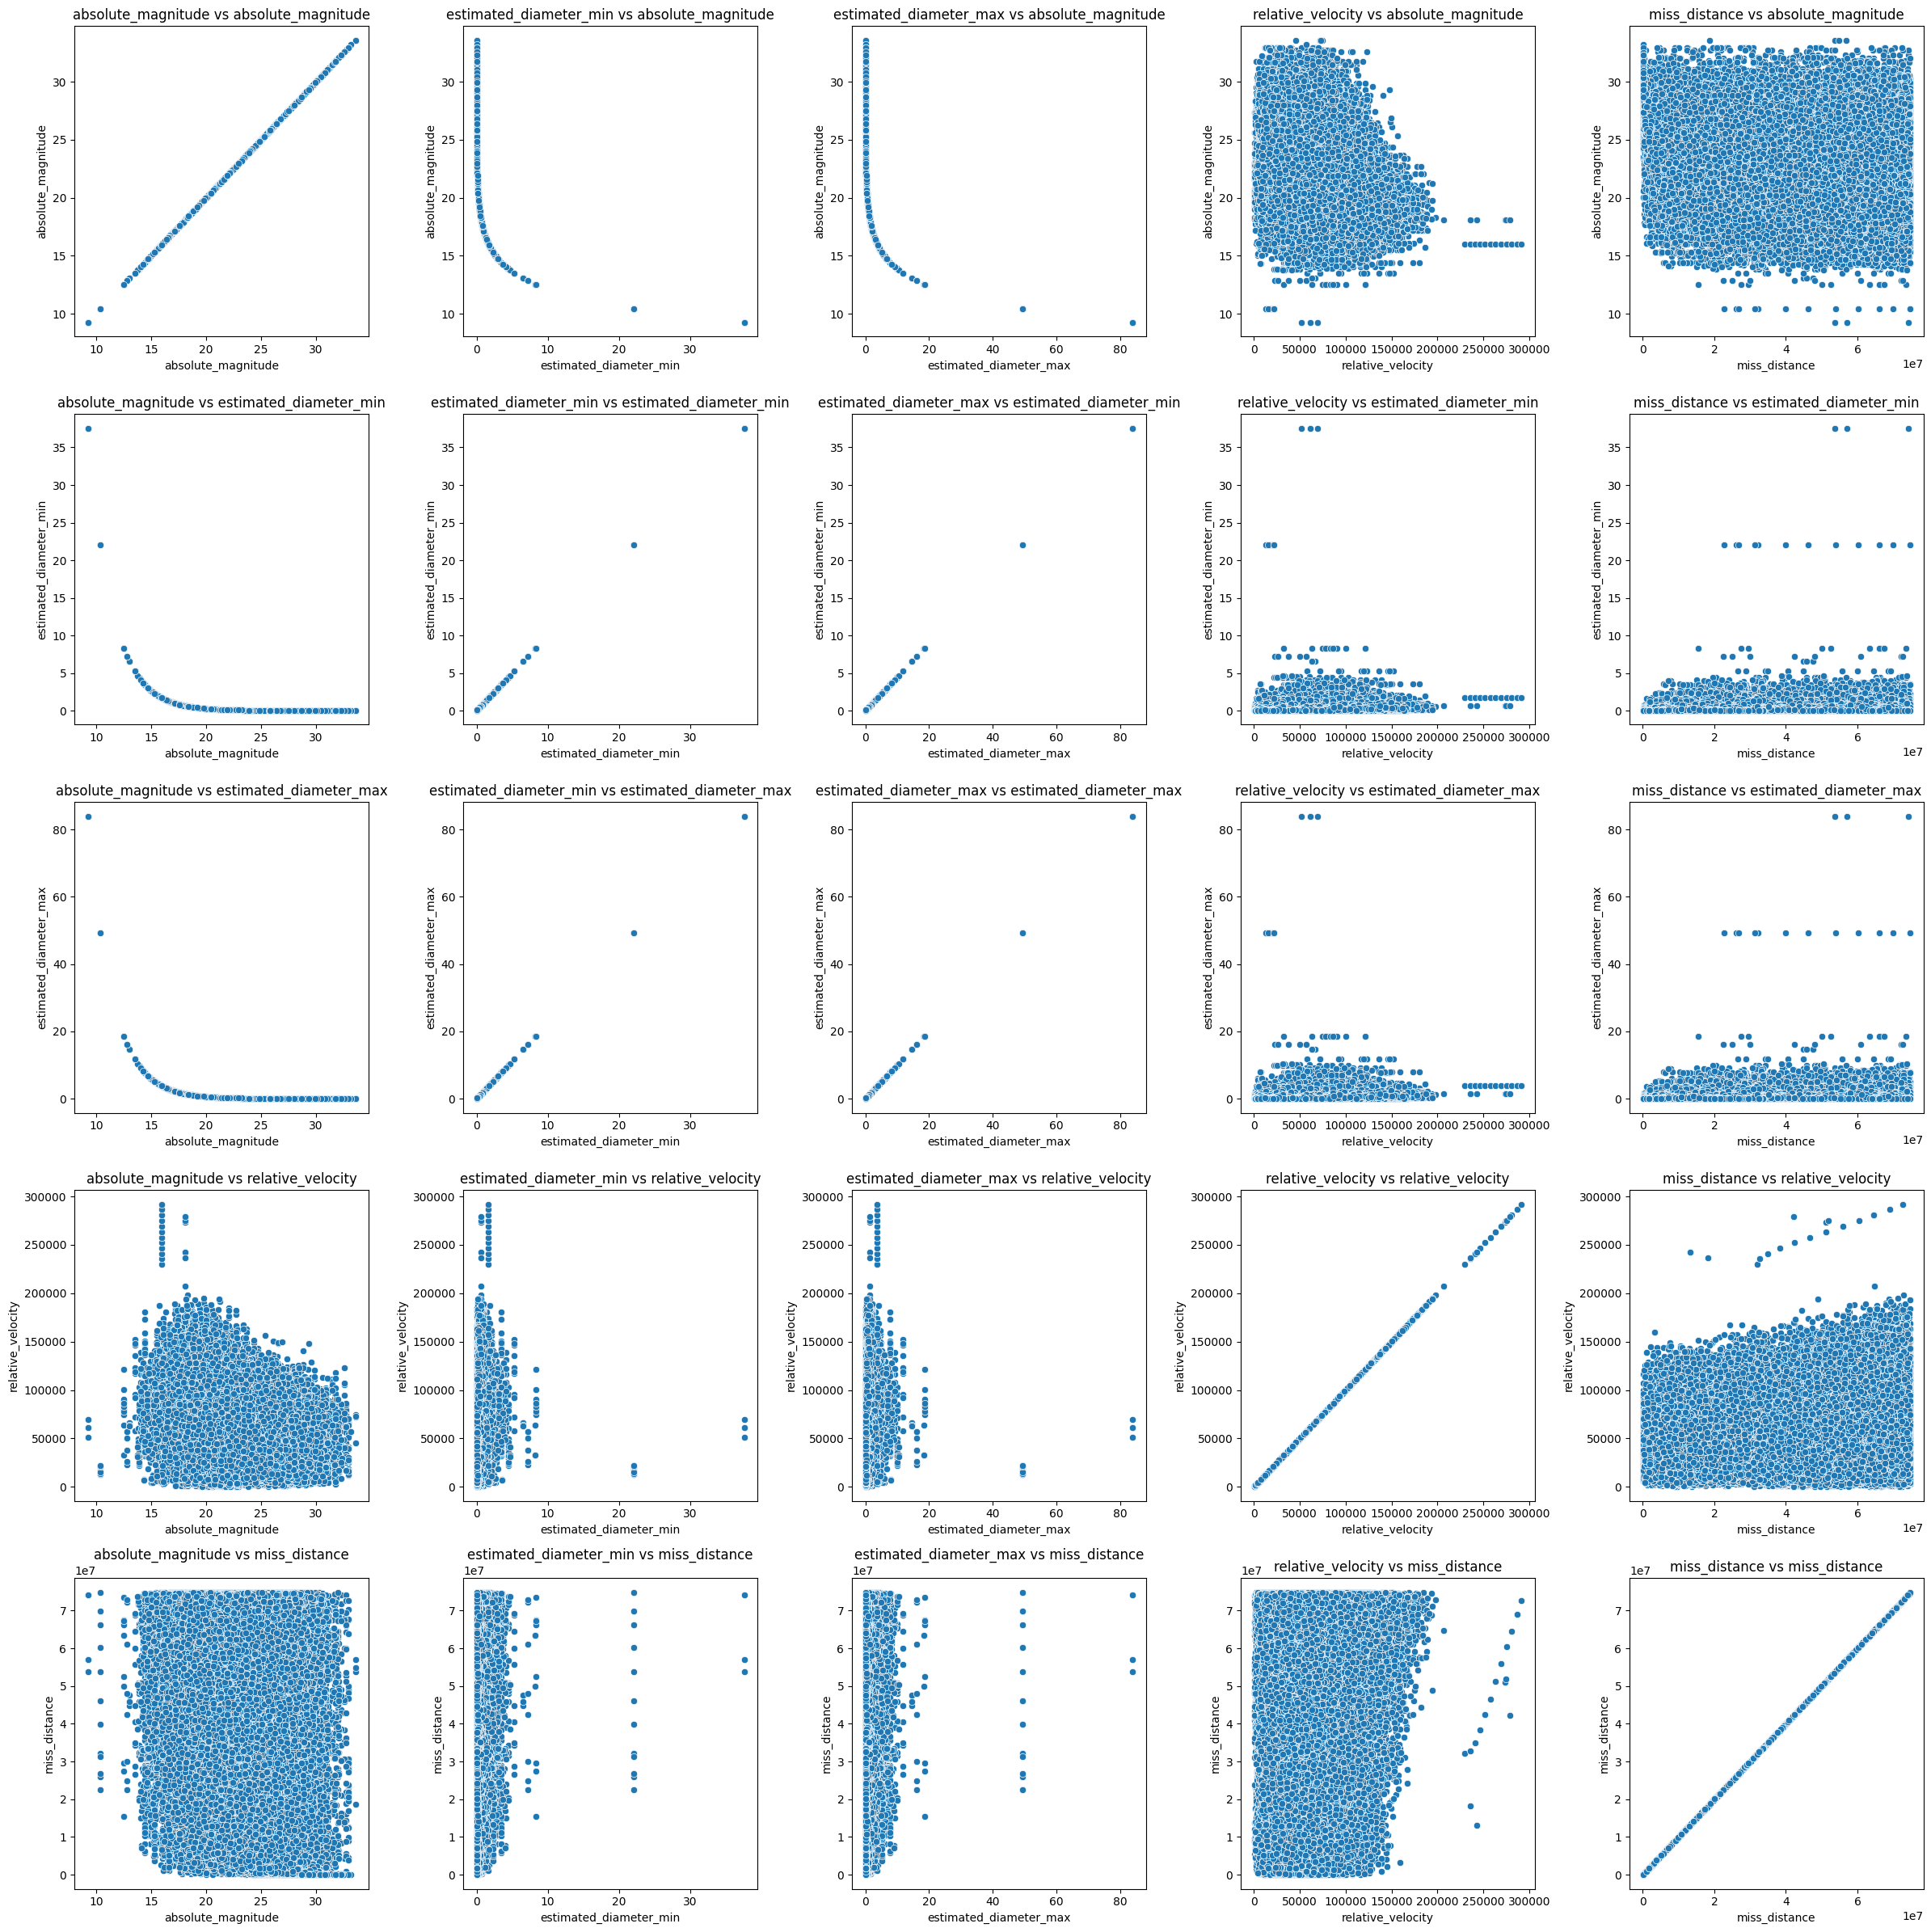

In [12]:
count = 1
plt.figure(figsize=(24,24))
for i, fea in enumerate(input_features):
    for j, features in enumerate(input_features):
        plt.subplot(5,5,count)
        count +=1
        sns.scatterplot(x= df[features], y = df[fea])
        plt.title(f'{features} vs {fea}')
        plt.xlabel(features)
        plt.ylabel(fea)
plt.tight_layout()
plt.show() 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X_train: (236719, 5)
Shape of X_test: (101452, 5)
Shape of y_test: (101452, 1)
Shape of y_train: (236719, 1)


In [14]:
y_train_df = pd.DataFrame(y_train, columns=['is_hazardous'])
y_train_df['is_hazardous'].value_counts()

is_hazardous
0    206396
1     30323
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE #type: ignore

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [16]:
X_resampled.shape

(412792, 5)

In [17]:
y_resampled.shape

(412792, 1)

In [18]:
y_resampled.value_counts()

is_hazardous
0               206396
1               206396
Name: count, dtype: int64

In [19]:
#df.absolute_magnitude[334417]

In [20]:
df.isnull().sum()

absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [21]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'kernel' : ['rbf', 'linear'],
#     'C': [0.1,1,10,100]
# }
# classification_model = SVC()
# tuner_model = GridSearchCV(classification_model, parameters)
# tuner_model.fit(X_resampled, y_resampled)

In [22]:
from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# parameters = {
#     'kernel' : ['rbf', 'linear'],
#     'C': [0.1,1,10,100]
# }
classification_model = SVC()
#tuner_model = GridSearchCV(classification_model, parameters)
#tuner_model.fit(X_resampled, y_resampled)
classification_model.fit(X_resampled, y_resampled)

c:\Arun\anaconda3\envs\condaEnv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [23]:
y_pred = classification_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)
print(f'Accuray of the model: {accuracy_score}')

Accuray of the model: 0.7159247723061152


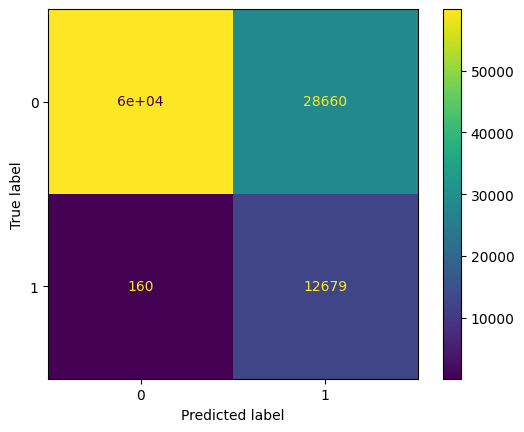

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = classification_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = classification_model.classes_)
disp.plot()
plt.show()
